In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_theme()

# Data Formatting

In [2]:
data = pd.read_csv('cogs_13_final_unformatted.csv')

In [4]:
data.head()

,Location,name (who recorded),on UCSD campus (y/n),date,time,female cashier (y/n),Group Size (#),"Payment Type (Contactless, Card, Cash)","Tip Type (Cash, Electronic, No-tip)",Interaction Time (seconds),"Order Type (dine-in, to-go)",Waited in Line (y/n)
0,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:06 PM,n,1,contactless,no-tip,30,dine-in,n
1,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:07 PM,n,1,contactless,electric,40,to-go,n
2,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:08 PM,n,1,contactless,no-tip,25,dine-in,n
3,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:09 PM,n,1,contactless,no-tip,30,dine-in,n
4,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:10 PM,n,1,contactless,no-tip,50,dine-in,n


In [5]:
data.columns = [
    'location',
    'name',
    'on_campus',
    'date',
    'time',
    'female_cashier',
    'group_size',
    'payment_type',
    'tip_type',
    'interaction_time',
    'order_type',
    'waited_in_line'
]

In [6]:
data.head()

,location,name,on_campus,date,time,female_cashier,group_size,payment_type,tip_type,interaction_time,order_type,waited_in_line
0,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:06 PM,n,1,contactless,no-tip,30,dine-in,n
1,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:07 PM,n,1,contactless,electric,40,to-go,n
2,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:08 PM,n,1,contactless,no-tip,25,dine-in,n
3,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:09 PM,n,1,contactless,no-tip,30,dine-in,n
4,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:10 PM,n,1,contactless,no-tip,50,dine-in,n


In [7]:
data['on_campus'] = data['on_campus'].str.lower()
data['female_cashier'] = data['female_cashier'].str.lower().str.strip()
data['waited_in_line'] = data['waited_in_line'].str.lower()
data['order_type'] = data['order_type'].str.lower().str.replace(' ', '')

def process_date(date_str):
    if date_str.endswith('2024'):
        return date_str[:-4] + '24'
    else:
        return date_str

def process_payment(pay_str):
    if 'Apple' in pay_str:
        return 'contactless'
    elif 'card' in pay_str.lower():
        return 'card'
    else:
        return pay_str.lower()

def process_tip(tip_str):
    if 'tipped' in tip_str.lower():
        return 'electronic'
    elif tip_str == 'electric':
        return 'electronic'
    elif 'no-tip' in tip_str.lower():
        return 'no-tip'
    else:
        return tip_str.lower()

def process_location(loc_str):
    return ' '.join(loc_str.split(' ')[:2])

data['date'] = data['date'].apply(process_date)
data['payment_type'] = data['payment_type'].apply(process_payment)
data['tip_type'] = data['tip_type'].apply(process_tip)
data['time'] = data['time'].str.replace(' ', '')
    

In [8]:
data.head()

,location,name,on_campus,date,time,female_cashier,group_size,payment_type,tip_type,interaction_time,order_type,waited_in_line
0,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:06PM,n,1,contactless,no-tip,30,dine-in,n
1,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:07PM,n,1,contactless,electronic,40,to-go,n
2,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:08PM,n,1,contactless,no-tip,25,dine-in,n
3,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:09PM,n,1,contactless,no-tip,30,dine-in,n
4,Fan Fan (Sixth College at UCSD),Alexander Zhou,y,12/4/24,7:10PM,n,1,contactless,no-tip,50,dine-in,n


In [9]:
data['date'].value_counts()

date
12/4/24    80
12/5/24    76
Name: count, dtype: int64

In [10]:
data['payment_type'].value_counts()

payment_type
contactless    122
card            34
Name: count, dtype: int64

In [11]:
data['tip_type'].value_counts()

tip_type
no-tip        111
electronic     45
Name: count, dtype: int64

In [12]:
data['order_type'].value_counts()

order_type
dine-in    79
to-go      77
Name: count, dtype: int64

In [13]:
data.to_csv('charts/formatted_data.csv')

In [13]:
def get_row_datetime(row):
    combined_str = row['date'] + ' ' + row['time'].replace(' ', '')
    return dt.datetime.strptime(combined_str.replace('/', ' '), '%m %d %y %I:%M%p')
data['datetime'] = data.apply(get_row_datetime, axis=1)
data['time_parsed'] = data['time'].apply(lambda x: dt.datetime.strptime(x.replace(' ', ''), '%I:%M%p'))

In [14]:
data.shape

(156, 12)

# Exploratory Analysis

In [14]:
def generate_analysis(x_var, y_var, legend_label, title):
    data_temp = data.groupby([x_var, y_var])['name'].count().reset_index(name='count').rename(columns={y_var: legend_label})
    if x_var == 'location':
        data_temp['location'] = data_temp['location'].apply(process_location)
        xlabel = 'Location'
        
    else:
        data_temp['on_campus'] = data_temp['on_campus'].apply(lambda x: 'on-campus' if x == 'y' else 'off-campus')
        xlabel = 'Campus'

    data_temp.sort_values(inplace=True, by=legend_label)

    sns.barplot(data_temp, x=x_var, y='count', hue=legend_label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    filename = title.replace(' ', '_').lower()
    plt.savefig(f'charts/{filename}')
    plt.show()

In [15]:
data_grouped = data[data['tip_type'] == 'electronic'].groupby(['on_campus', 'group_size'])['name'].count().reset_index(name='count')
data_grouped_agg = data.groupby(['on_campus', 'group_size'])['name'].count().reset_index(name='count')
data_grouped['rate'] = data_grouped['count'] / data_grouped_agg['count']
data_grouped

,on_campus,group_size,count,rate
0,n,1,7,0.368421
1,n,2,4,0.571429
2,n,4,1,1.000000
3,y,1,31,0.258333
4,y,2,2,0.250000


In [19]:
def generate_tip_analysis(y_var, legend_label, title):
    data_temp = data[data['tip_type'] == 'electronic'].groupby(['on_campus', y_var])['name'].count().reset_index(name='count')
    data_temp_agg = data.groupby(['on_campus', y_var])['name'].count().reset_index(name='count')
    data_temp['rate'] = data_temp['count'] * 100 / data_temp_agg['count']
    
    data_temp = data_temp.rename(columns={y_var: legend_label})
    
    data_temp['on_campus'] = data_temp['on_campus'].apply(lambda x: 'on-campus' if x == 'y' else 'off-campus')
    xlabel = 'Campus'

    data_temp.sort_values(inplace=True, by=legend_label)
    data_temp['count'] = data_temp['count'].astype(int)

    sns.barplot(data_temp, x='on_campus', y='rate', hue=legend_label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Tip Rate %')
    filename = title.replace(' ', '_').lower()
    plt.savefig(f'charts/{filename}')
    plt.show()

### Entries by location

In [17]:
data_1 = data.groupby('location')['name'].count().reset_index(name='entries')
data_1['location'] = data_1['location'].apply(process_location)

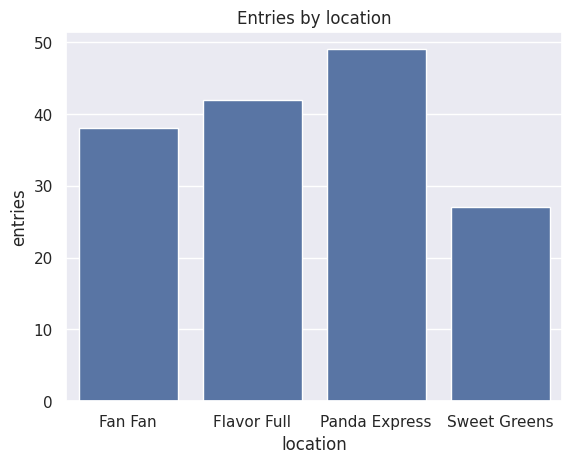

In [18]:
plt.title('Entries by location')
sns.barplot(data_1, x='location', y='entries')
plt.savefig('charts/entries_by_location.png')

### Entries by date and time

/tmp/ipykernel_42397/2204172394.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


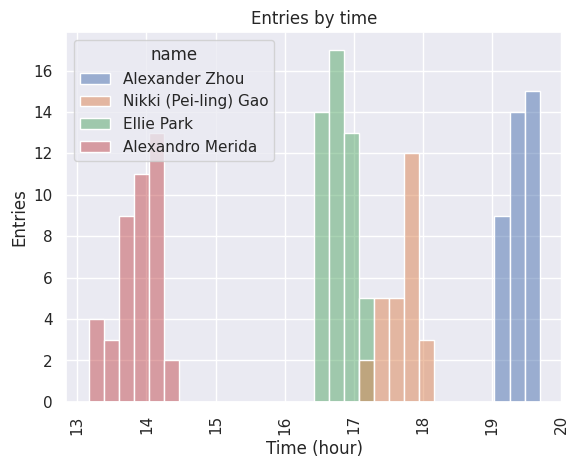

In [19]:
plt.xticks(rotation=90)
sns.histplot(data, x='time_parsed', hue='name', bins=30)
ax = plt.gca()
labels = [item.get_text()[-2:] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('Time (hour)')
plt.title('Entries by time')
ax.set_ylabel('Entries')
plt.savefig('charts/entries_by_time.png')

### Group size by location

In [20]:
data_4 = data.groupby(['location', 'group_size'])['name'].count().reset_index(name='count').rename(columns={'group_size': 'Group Size'})
data_4['location'] = data_4['location'].apply(process_location)

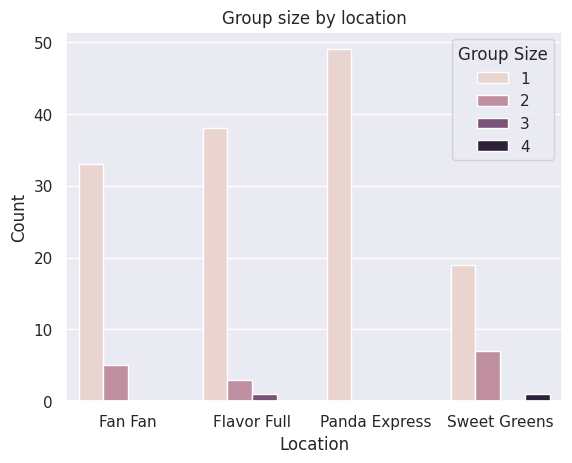

In [21]:
sns.barplot(data_4, x='location', y='count', hue='Group Size')
plt.title('Group size by location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.savefig('charts/group_by_location.png')

### Group size by campus

In [22]:
data_5 = data.groupby(['on_campus', 'group_size'])['name'].count().reset_index(name='count').rename(columns={'group_size': 'Group Size'})
data_5['on_campus'] = data_5['on_campus'].apply(lambda x: 'on-campus' if x == 'y' else 'off-campus')

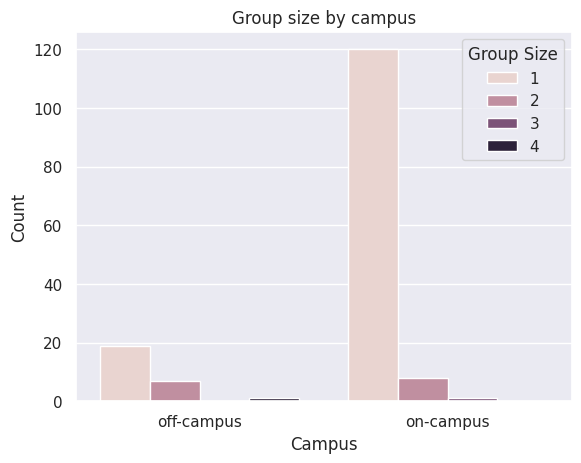

In [23]:
sns.barplot(data_5, x='on_campus', y='count', hue='Group Size')
plt.xlabel('Campus')
plt.ylabel('Count')
plt.title('Group size by campus')
plt.savefig('charts/group_by_campus.png')

### Interaction Time by Location

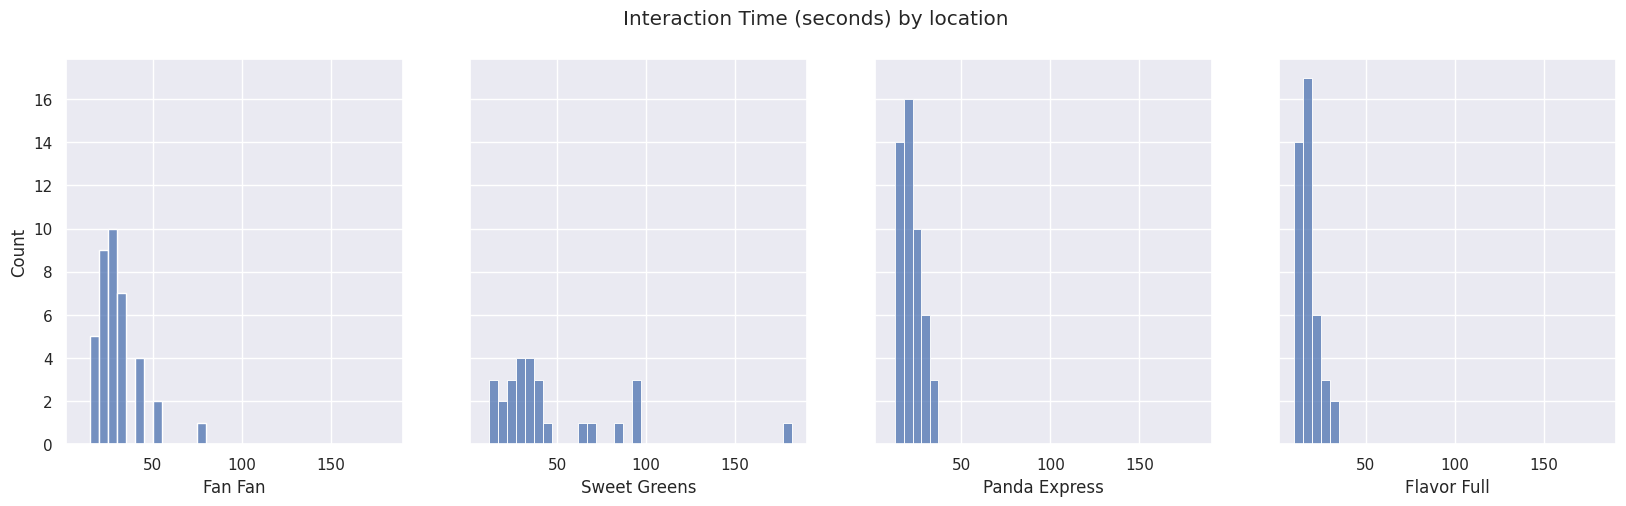

In [24]:
data_6 = data
data_6['location'] = data_6['location'].apply(process_location)

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

locations = data_6['location'].unique()

for i in range(4):
    sns.histplot(data_6[data_6['location'] == locations[i]], x='interaction_time', ax=axes[i], binwidth=5)
    axes[i].set_xlabel(locations[i])

fig.suptitle('Interaction Time (seconds) by location')

plt.savefig('charts/interaction_by_location.png')


### Payment type

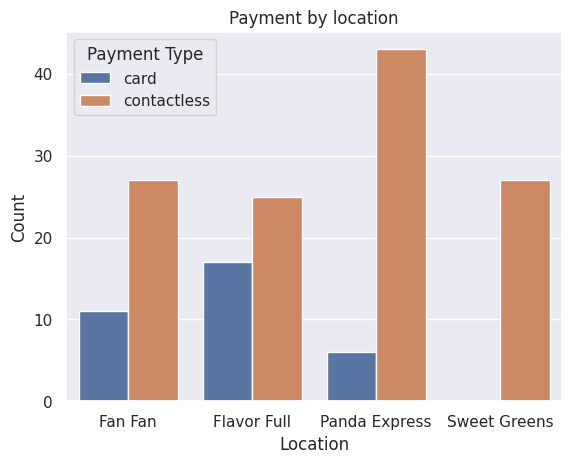

In [25]:
generate_analysis('location', 'payment_type', 'Payment Type', 'Payment by location')

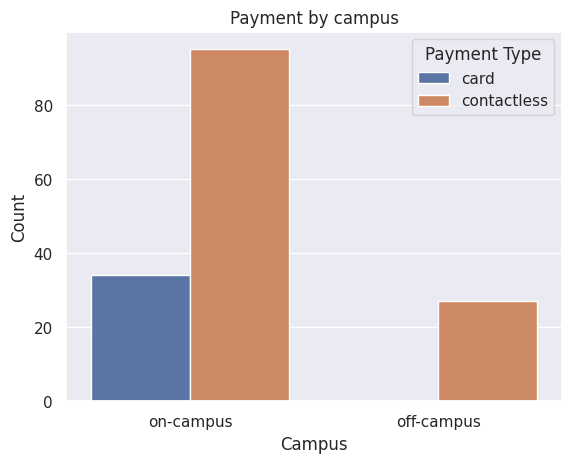

In [26]:
generate_analysis('on_campus', 'payment_type', 'Payment Type', 'Payment by campus')

### Cashier gender

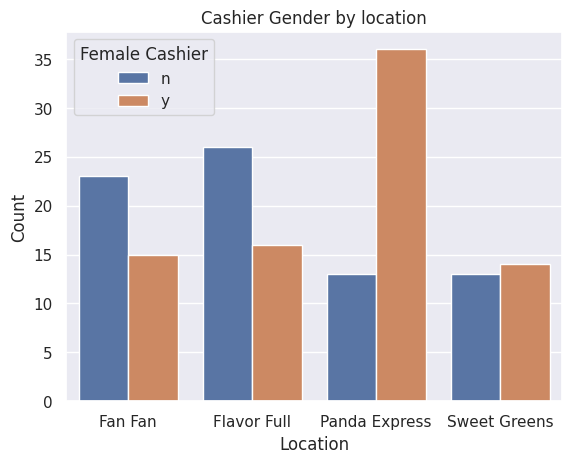

In [27]:
generate_analysis('location', 'female_cashier', 'Female Cashier', 'Cashier Gender by location')

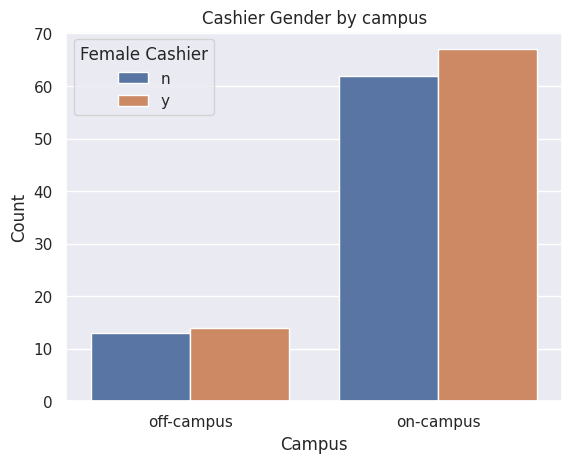

In [28]:
generate_analysis('on_campus', 'female_cashier', 'Female Cashier', 'Cashier Gender by campus')

### Line Waiting

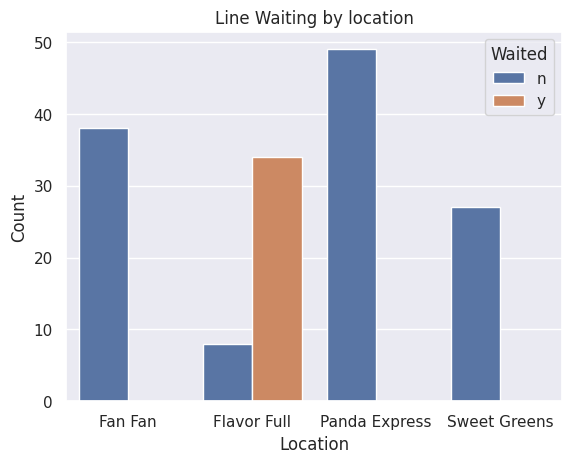

In [29]:
generate_analysis('location', 'waited_in_line', 'Waited', 'Line Waiting by location')

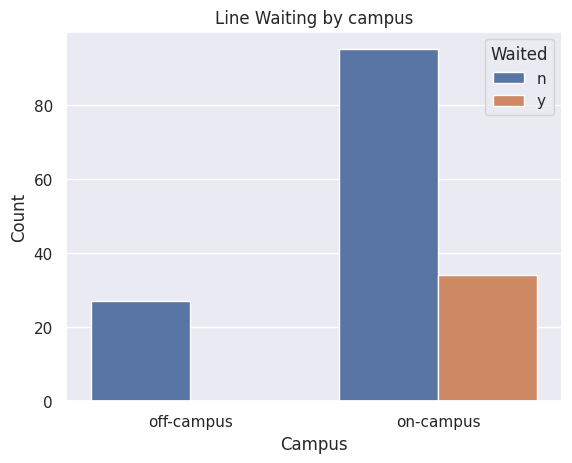

In [30]:
generate_analysis('on_campus', 'waited_in_line', 'Waited', 'Line Waiting by campus')

### Order Type

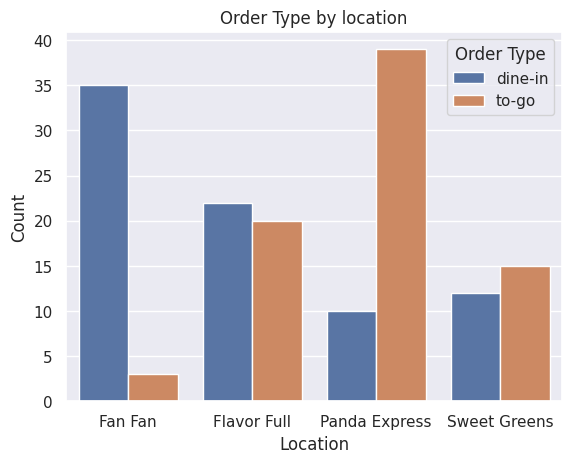

In [31]:
generate_analysis('location', 'order_type', 'Order Type', 'Order Type by location')

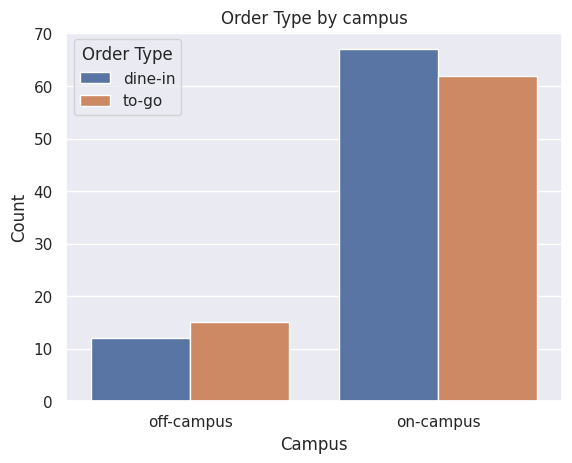

In [32]:
generate_analysis('on_campus', 'order_type', 'Order Type', 'Order Type by campus')

### Tips by location

In [33]:
data_2 = data.groupby(['location', 'tip_type'])['name'].count().reset_index(name='count').rename(columns={'tip_type': 'Tip Type'})
data_2['location'] = data_2['location'].apply(process_location)

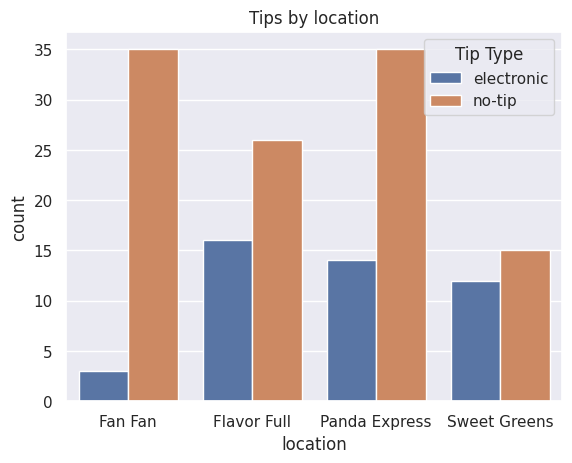

In [34]:
sns.barplot(data_2, x='location', hue='Tip Type', y='count')
plt.title('Tips by location')
plt.savefig('charts/tips_by_location.png')

### Tips by campus

In [35]:
data_3 = data.groupby(['on_campus', 'tip_type'])['name'].count().reset_index(name='count').rename(columns={'tip_type': 'Tip Type'})
data_3['on_campus'] = data_3['on_campus'].apply(lambda x: 'on-campus' if x == 'y' else 'off-campus')

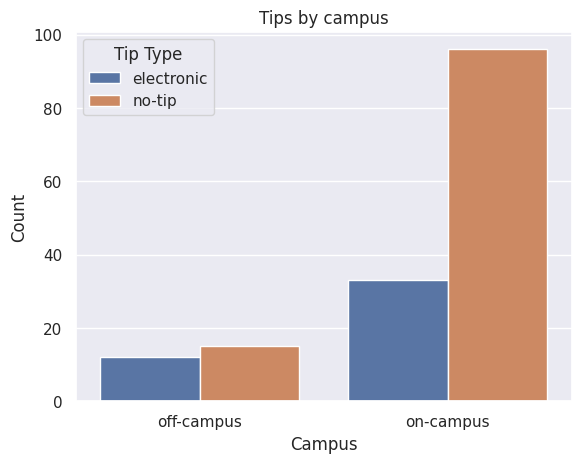

In [36]:
sns.barplot(data_3, x='on_campus', y='count', hue='Tip Type')
plt.xlabel('Campus')
plt.ylabel('Count')
plt.title('Tips by campus')
plt.savefig('charts/tips_by_campus.png')

### Tips by payment

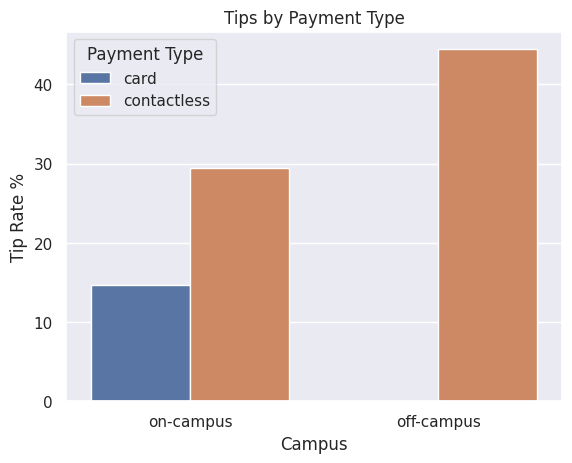

In [37]:
generate_tip_analysis('payment_type', 'Payment Type', 'Tips by Payment Type')

### Tips by Order

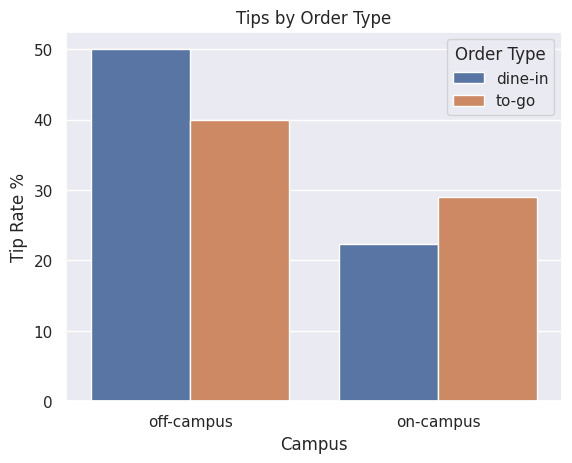

In [38]:
generate_tip_analysis('order_type', 'Order Type', 'Tips by Order Type')

### Tips by Line Waiting

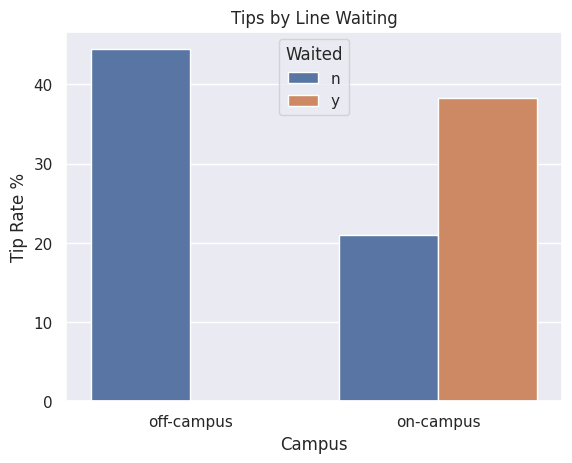

In [39]:
generate_tip_analysis('waited_in_line', 'Waited', 'Tips by Line Waiting')

### Tips by Group Size

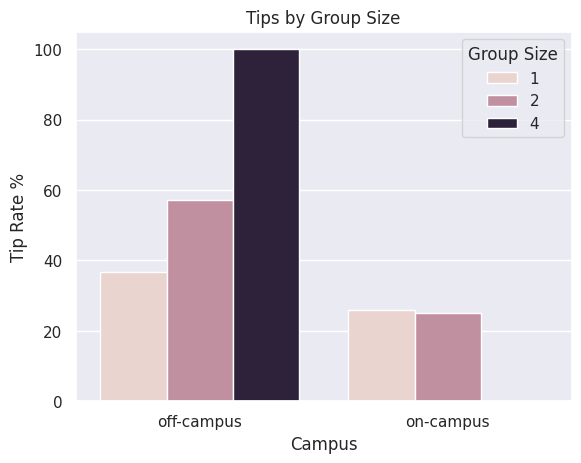

In [40]:
generate_tip_analysis('group_size', 'Group Size', 'Tips by Group Size')

### Tips by Cashier Gender

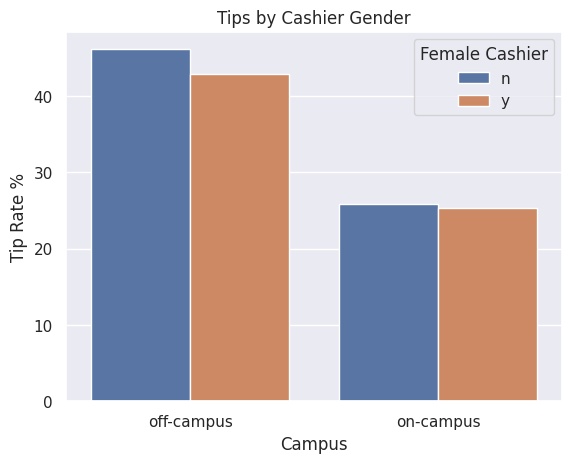

In [41]:
generate_tip_analysis('female_cashier', 'Female Cashier', 'Tips by Cashier Gender')

### Tips by Interaction Time

In [22]:
def bin_interaction_time(inter_time):
    if inter_time <= 10:
        return '0-10'
    elif inter_time <= 20:
        return '10-20'
    elif inter_time <= 30:
        return '20-30'
    else:
        return '30+'

data['inter_bin'] = data['interaction_time'].apply(bin_interaction_time)

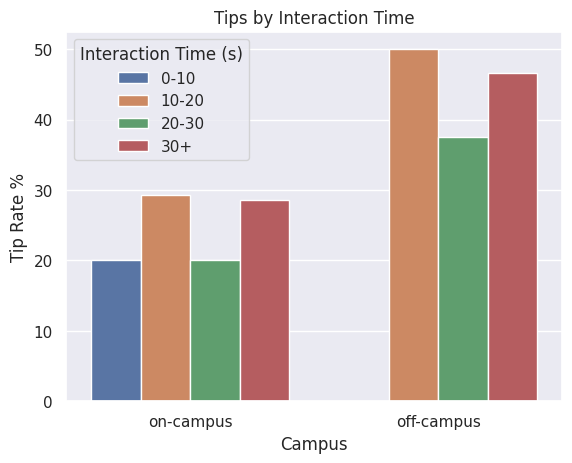

In [23]:
generate_tip_analysis('inter_bin', 'Interaction Time (s)', 'Tips by Interaction Time')

### Misc calculations

In [15]:
data.shape

(156, 12)